# Secretory Reactions
Here we will map all the secretory reactions from the [Mammalian Secretory Pathway Reconstruction paper](https://www.nature.com/articles/s41467-019-13867-y) to the genes in our reconstruction.

1. Load Secretory Pathway Reactions

In [80]:
import datetime

import re
import pandas as pd
import numpy as np
from google_sheet import GoogleSheet
from collections import defaultdict

import matplotlib.pyplot as plt
from venn import venn

In [6]:
##### ----- Generate datasets from Google Sheet ----- #####

#Credential file
KEY_FILE_PATH = 'credentials.json'

#CHO Network Reconstruction + Recon3D_v3 Google Sheet ID
Sec_Recon_SPREADSHEET_ID = '1DaAdZlvMYDqb7g31I5dw-ZCZH52Xj_W3FnQMFUzqmiQ'

# Initialize the GoogleSheet object
sec_recon_gsheet_file = GoogleSheet(Sec_Recon_SPREADSHEET_ID, KEY_FILE_PATH)

# Read data from SecRecon
sec_genes_sheet = 'SecRecon'
sec_genes = sec_recon_gsheet_file.read_google_sheet(sec_genes_sheet)

In [9]:
# Load the rest of the recons
Feizi = pd.read_excel('Input/Feizi_secRecon.xlsx', skiprows=4)
Lund = pd.read_excel('Input/Lund_secRecon.xlsx')
Lund['CHO_GeneID'] = Lund['CHO_GeneID'].astype(str).str.replace(r'\.0$', '', regex=True)
Jahir = pd.read_excel('Input/Jahir_secRecon.xlsx', sheet_name="Components (Human)")

/Users/pablodigiusto/miniforge3/envs/secrecon2.0/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [54]:
# Create a  mapping dict

choentrez_symbol = {row['CHO ENTREZID']: row['GENE SYMBOL'] for _, row in sec_genes.dropna(subset=['GENE SYMBOL', 'CHO ENTREZID']).iterrows()}

In [41]:
Feizi_cho_id_list = []

for i,row in Feizi.iterrows():
    gene_symbol = row['gene_name']
    if gene_symbol in symbol_choentrez.keys():
        Feizi_cho_id_list.append(gene_symbol)

In [56]:
Lund_gene_list = []
for i,row in Lund.iterrows():
    cho_entrez = row['CHO_GeneID']
    if cho_entrez in choentrez_symbol.keys():
        Lund_gene_list.append(choentrez_symbol[cho_entrez])
    else:
        Lund_gene_list.append(cho_entrez)

In [64]:
Jahir_gene_list = list(Jahir['Standard Gene Name'])

In [83]:
sec_genes

,Curated,GENE SYMBOL,ALIAS,GENENAME,HUMAN ENTREZID,HUMAN ENSEMBL,HUMAN UNIPROT,HUMAN PROTEIN COMPLEX,CHO GENE SYMBOL,CHO ENTREZID,...,Process 8 Ref,Process 8 Genes,Process 9,Process 9 Mean Score,Process 9 Score SD,Process 9 Score Count,Process 9 Raw Scores,Process 9 Curators,Process 9 Ref,Process 9 Genes
0,,A3GALT2,"A3GALT2P,IGB3S,IGBS3S,A3GALT2","alpha 1,3-galactosyltransferase 2",127550,ENSG00000184389,U3KPV4,,A3galt2,100774283,...,None,None,None,None,None,None,None,None,None,None
1,,A4GALT,"A14GALT,A4GALT1,Gb3S,P(k),P1,P1PK,PK,A4GALT","alpha 1,4-galactosyltransferase (P blood group)",53947,ENSG00000128274,"A9XEA7, Q7Z2I1, Q6RJW0, Q540I5, Q9NPC4, A0A0S2...",,A4galt,100770462,...,None,None,None,None,None,None,None,None,None,None
2,,A4GNT,"alpha4GnT,A4GNT","alpha-1,4-N-acetylglucosaminyltransferase",51146,ENSG00000118017,"Q0VDK2, Q9UNA3, Q0VDK1",,A4gnt,100771969,...,None,None,None,None,None,None,None,None,None,None
3,,ABL1,"ABL,BCR-ABL,CHDSKM,JTK7,bcr/abl,c-ABL,c-ABL1,p...","ABL proto-oncogene 1, non-receptor tyrosine ki...",25,ENSG00000097007,"Q16133, Q59FK4, Q13870, A3KFJ3, Q45F09, Q17R61...",BRCA1-cABL complex; c-Abl-cortactin-nmMLCK com...,Abl1,100768098,...,None,None,None,None,None,None,None,None,None,None
4,,ABL2,"ABLL,ARG,ABL2","ABL proto-oncogene 2, non-receptor tyrosine ki...",27,ENSG00000143322,"B7UEF4, Q5T0X6, A0M8X0, P42684, B7UEF3, B7UEF5...",ABL2-HRAS-RIN1 complex,Abl2,100772469,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,JT,TRIM22,"RNF94, STAF50, GPSTAF50",tripartite motif containing 22,10346,ENSG00000132274,"A0A348GSH8, Q15521, Q05CQ0, D3DQT0, Q8IYM9",,Trim31,100771705,...,None,None,None,None,None,None,None,None,None,None
1126,JT,TRIM36,"ANPH, ANPH1, RNF98, HAPRIN, RBCC728",tripartite motif containing 36,55521,ENSG00000152503,"Q0P5Z9, A1L3Z1, B7ZAV7, Q9NQ86, B7Z3V4, A6NDD0...",,Trim36,100758865,...,None,None,None,None,None,None,None,None,None,None
1127,JT,TRIM16,EBBP,tripartite motif containing 16,10626,ENSG00000221926,"A0PK10, B4DE22, Q309B1, B2RUW6, Q7Z6I2, Q6IAL8...",,Trim16,100753576,...,None,None,None,None,None,None,None,None,None,None
1128,JT,TRIM5,"RNF88, TRIM5alpha",tripartite motif containing 5,85363,ENSG00000132256,"Q2MLV8, Q9C033, Q2MLY4, Q9C031, Q9C032, Q2MLW4...",,LOC100752691,100752691,...,None,None,None,None,None,None,None,None,None,None


In [82]:
Jahir

,Standard Gene Name,UNIPROT ID,Length,Location in Secretory Model,Sequence,Subsystem,Protein name,GeneID
0,ALG1,Q9BT22,464,Catalyzer,MAASCLVLLALCLLLPLLLLGGWKRWRRGRAARHVVAVVLGDVGRS...,Dolichol pathway,Chitobiosyldiphosphodolichol beta-mannosyltran...,56052
1,ALG10B,Q5I7T1,473,Catalyzer,MAQLEGYCFSAALSCTFLVSCLLFSAFSRALREPYMDEIFHLPQAQ...,Dolichol pathway,Putative Dol-P-Glc:Glc(2)Man(9)GlcNAc(2)-PP-Do...,144245
2,ALG11,Q2TAA5,492,Catalyzer,MAAGERSWCLCKLLRFFYSLFFPGLIVCGTLCVCLVIVLWGIRLLL...,Dolichol pathway,"GDP-Man:Man(3)GlcNAc(2)-PP-Dol alpha-1,2-manno...",440138
3,ALG12,Q9BV10,488,Catalyzer,MAGKGSSGRRPLLLGLLVAVATVHLVICPYTKVEESFNLQATHDLL...,Dolichol pathway,"Dol-P-Man:Man(7)GlcNAc(2)-PP-Dol alpha-1,6-man...",79087
4,ALG13,Q9NP73,1137,Catalyzer,MKCVFVTVGTTSFDDLIACVSAPDSLQKIESLGYNRLILQIGRGTV...,Dolichol pathway,Putative bifunctional UDP-N-acetylglucosamine ...,79868
...,...,...,...,...,...,...,...,...
266,USE1,Q9H832,354,[c],MAESPTEEAATAGAGAAGPGASSVAGVVGVSGSGGGFGPPFLPDVW...,COPI,Ubiquitin-conjugating enzyme E2 Z (EC 2.3.2.23...,65264
267,VCP,P55072,806,[c],MASGADSKGDDLSTAILKQKNRPNRLIVDEAINEDNSVVSLSQPKM...,ERAD,Transitional endoplasmic reticulum ATPase (TER...,7415
268,VIMP,Q9BQE4,189,[c],MERQEESLSARPALETEGLRFLHTTVGSLLATYGWYIVFSCILLYV...,ERAD,Selenoprotein S (SelS) (VCP-interacting membra...,55829
269,WRB,O00258,174,[r],MSSAAADHWAWLLVLSFVFGCNVLRILLPSFSSFMSRVLQKDAEQE...,Translocation,Tail-anchored protein insertion receptor WRB (...,7485


In [70]:
Feizi_gene_list = list(Feizi['gene_name'])
Feizi_gene_list = [element for element in Feizi_gene_list if not isinstance(element, datetime.datetime)]

In [84]:
Feizi

,ensgid,gene_name,Subsystem,category.HPA,tissues.HPA,category.GTEx,tissues.GTEx,fpkm.HPA.adrenal,fpkm.HPA.appendices,fpkm.HPA.bonemarrow,...,fpkm.GTEx.prostate,fpkm.GTEx.skeletalmuscle,fpkm.GTEx.skin,fpkm.GTEx.smallintestine,fpkm.GTEx.spleen,fpkm.GTEx.stomach,fpkm.GTEx.testis,fpkm.GTEx.thyroid,fpkm.GTEx.uterus,fpkm.GTEx.vagina
0,ENSG00000255587,RAB44,Post-Golgi trafficking,Tissue enriched,bonemarrow,Enhanced,blood,0.04,0.49,27.67,...,0.46,0.06,0.68,0.56,0.89,0.37,0.13,0.05,0.39,0.54
1,ENSG00000135454,B4GALNT1,Golgi glycosylation,Tissue enriched,brain,Group enriched,"brain.cerebellum,brain.cerebrum,nerve",0.56,0.62,0.03,...,1.73,2.63,0.26,0.95,0.22,0.48,0.56,0.83,1.21,1.09
2,ENSG00000125814,NAPB,COPII,Tissue enriched,brain,Group enriched,"brain.cerebellum,brain.cerebrum",21.39,4.80,5.52,...,5.64,2.05,4.75,5.05,5.22,3.72,7.49,6.72,6.05,6.50
3,ENSG00000073969,NSF,COPII,Tissue enriched,brain,Expressed in all,NaN,14.46,13.96,4.66,...,9.25,11.03,9.75,9.38,9.92,8.49,14.16,8.88,6.93,7.71
4,ENSG00000135439,AGAP2,Trafficking regulation,Tissue enriched,brain,Group enriched,"brain.cerebellum,brain.cerebrum",1.47,7.62,7.22,...,1.59,3.04,1.03,5.51,9.41,1.36,0.95,1.96,1.05,0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,ENSG00000165105,RASEF,Post-Golgi trafficking,Enhanced,stomach,Mixed,NaN,0.45,1.56,0.01,...,7.21,0.03,0.79,2.24,0.05,6.33,0.87,8.12,0.26,1.19
571,ENSG00000126803,HSPA2,ERAD,Enhanced,testis,Enhanced,testis,2.86,6.65,0.39,...,12.27,32.59,24.05,31.68,18.82,14.73,140.97,2.50,29.93,7.71
572,ENSG00000135631,RAB11FIP5,Trafficking regulation,Enhanced,testis,Expressed in all,NaN,1.61,0.79,0.19,...,3.72,3.14,4.28,2.43,9.20,3.59,40.88,3.59,6.33,4.30
573,ENSG00000172780,RAB43,Post-Golgi trafficking,Enhanced,thyroid,Mixed,NaN,1.66,2.74,3.38,...,2.35,0.21,0.94,2.05,2.77,1.85,2.92,2.20,2.05,1.43


In [75]:
sec_recon_list = list(sec_genes['GENE SYMBOL'])

In [76]:
# Create sets from lists
sec_recon_set = set(sec_recon_list)
Lund_gene_set = set(Lund_gene_list)
Jahir_gene_set = set(Jahir_gene_list)
Feizi_gene_set = set(Feizi_gene_list)

<Figure size 1000x1000 with 0 Axes>

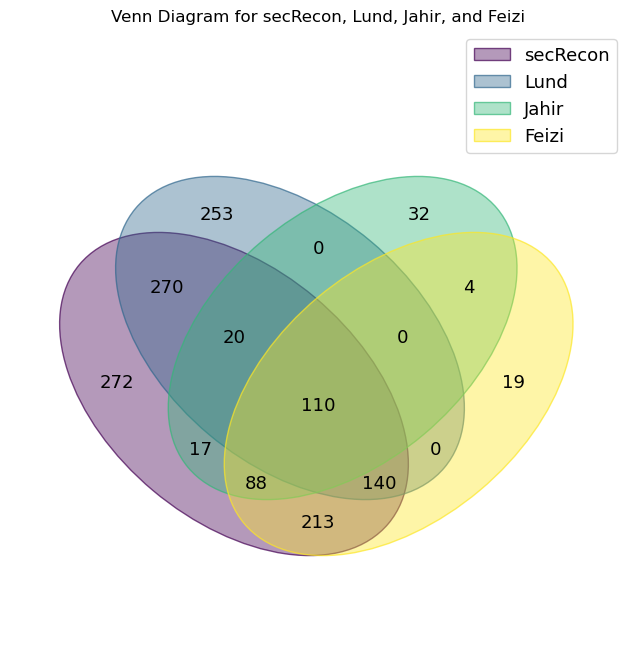

In [81]:
# Create a dictionary for the Venn diagram
venn_dict = {
    'secRecon': sec_recon_set,
    'Lund': Lund_gene_set,
    'Jahir': Jahir_gene_set,
    'Feizi': Feizi_gene_set
}

# Plot the Venn diagram
plt.figure(figsize=(10, 10))
venn(venn_dict)
plt.title("Venn Diagram for secRecon, Lund, Jahir, and Feizi")
plt.show()